### Document scanner

https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/

In [1]:
# import the necessary packages
from cv_course.lib_author import four_point_transform
from cv_course.lib import plot
import numpy as np
import cv2
import imutils

%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

In [3]:
new_height = 500
# load the image and compute and resize it
image = cv2.imread('../images/receipt.jpg')
ratio = image.shape[0] / new_height

orig = image.copy()
image = imutils.resize(image, height = new_height)
print(f'Orig: {orig.shape}, \nNew: {image.shape}')

Orig: (2448, 3264, 3), 
New: (500, 666, 3)


In [154]:
orig = cv2.imread('../images/caruana.jpg')

barra_vertical = (255 - np.zeros((orig.shape[0], 300, 3))).astype('uint8')

image = np.hstack([barra_vertical, orig, barra_vertical])

barra_horiz = (255 - np.zeros((300, image.shape[1], 3))).astype('uint8')

image = np.vstack([barra_horiz, image, barra_horiz])

<IPython.core.display.Javascript object>


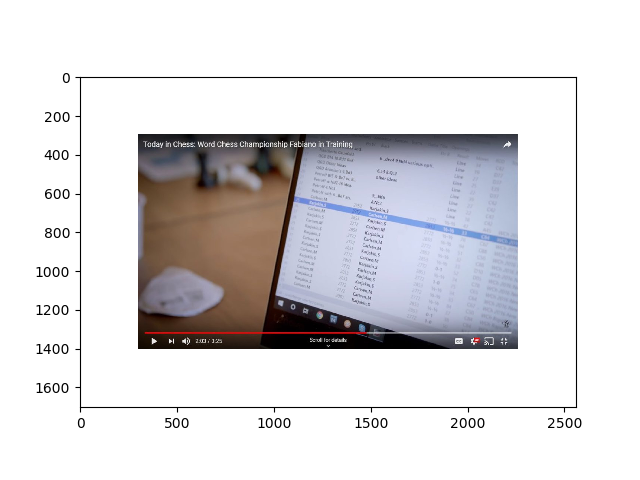

In [155]:
plot(image)

In [209]:
t = np.array([[1000, 1150], [2200, 1500], [1180, 200], [2527, 363]])

In [204]:
t = ((1000, 1150), (2200, 1500), (1180, 200), (2527, 363))

In [205]:
image2 = image.copy()
              
for p in t:
    cv2.circle(image2, p, 3, (0, 255, 0), 5);

<IPython.core.display.Javascript object>


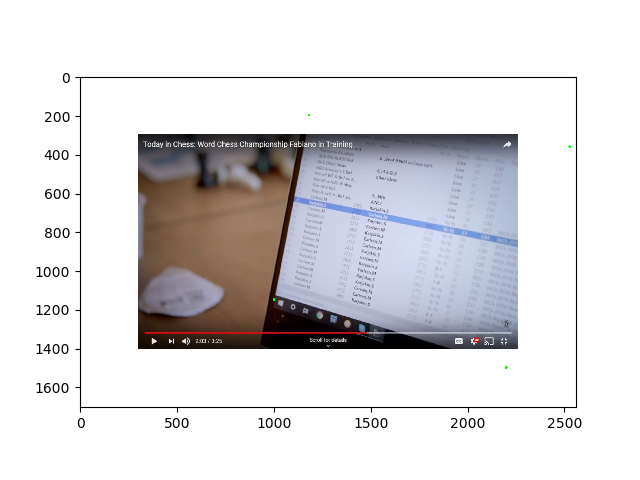

In [206]:
plot(image2)

In [210]:
t.shape

(4, 2)

In [211]:
i = four_point_transform(image2, t)

<IPython.core.display.Javascript object>


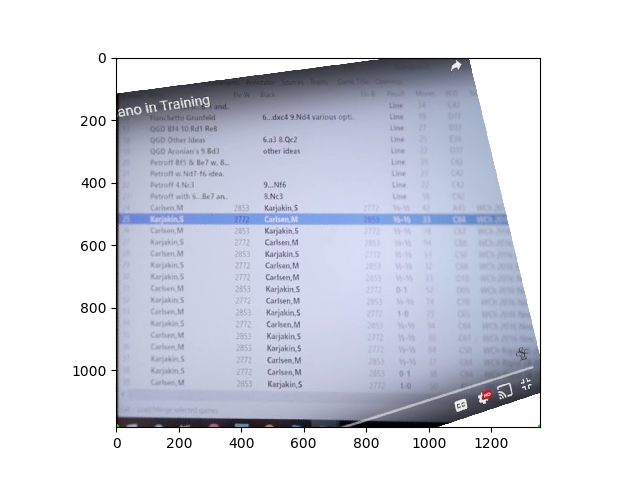

In [212]:
plot(i)

In [218]:
ii = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

In [221]:
th, iii = cv2.threshold(ii, 200, 255, cv2.THRESH_BINARY)

<IPython.core.display.Javascript object>


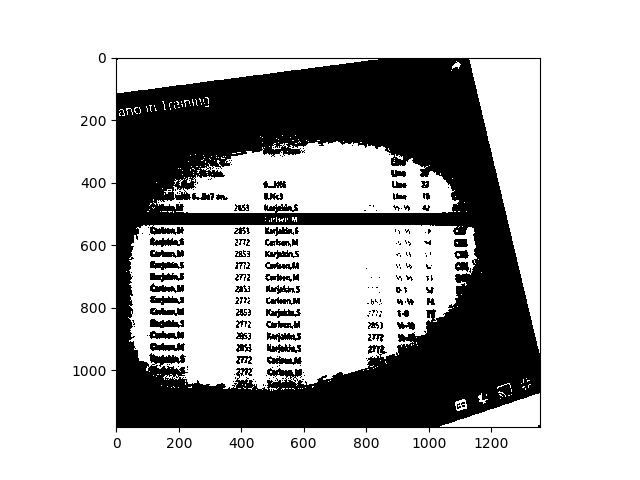

In [223]:
plot(iii)

<IPython.core.display.Javascript object>


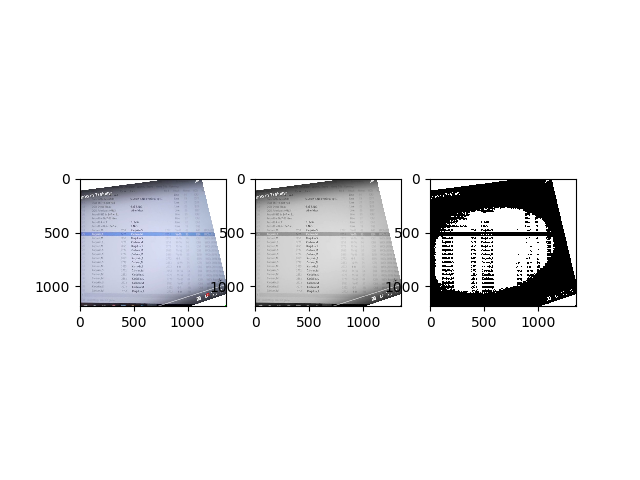

In [222]:
plot(i, ii, iii, ncols=3)

In [213]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [214]:
kernel

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

<IPython.core.display.Javascript object>


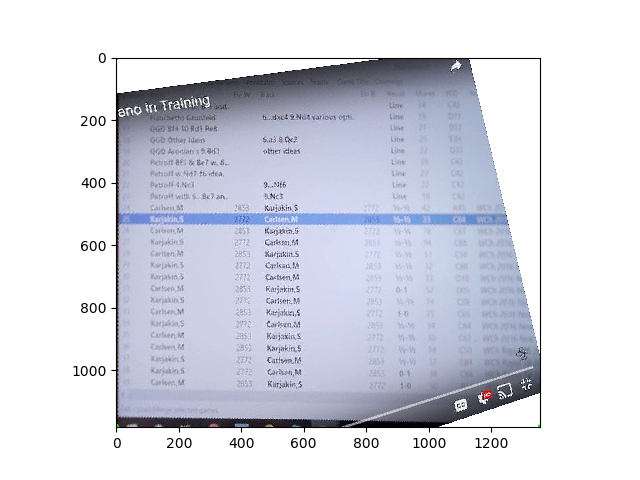

In [217]:
plot(cv2.filter2D(i, -1, kernel))

__FIND EDGES__

In [5]:
# convert the image to grayscale, blur it, and find edges in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

<IPython.core.display.Javascript object>


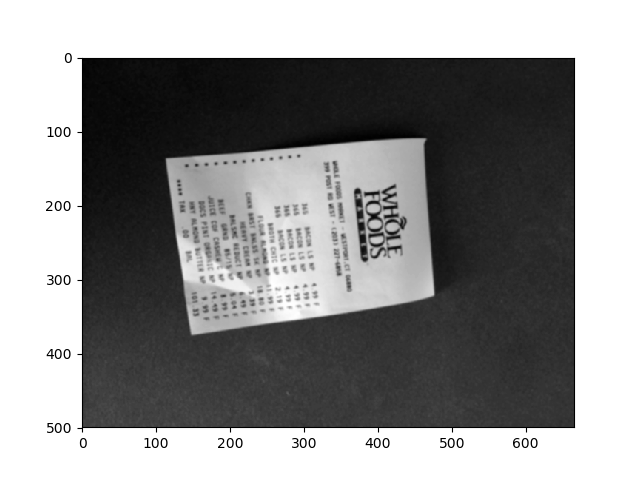

In [6]:
plot(blur)

In [7]:
edged = cv2.Canny(blur, 70, 255)

<IPython.core.display.Javascript object>


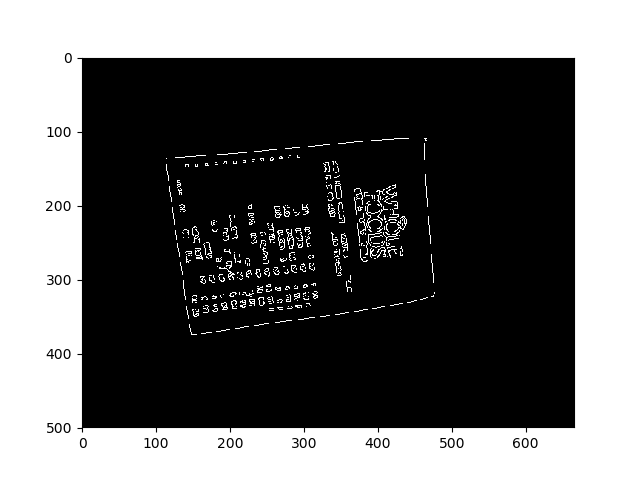

In [8]:
plot(edged)

__FIND CONTOURS__

In [9]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [10]:
len(cnts)

267

In [11]:
cv2.contourArea(cnts[0])

21.5

In [12]:
cv2.arcLength(cnts[0], closed=True)

20.727921843528748

In [13]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:20]

In [14]:
len(cnts)

20

__ELEGIR CONTORNO PADRE__

In [15]:
def approx_cont(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    
    return approx

In [16]:
# approxPoly, mostramos numero de vertices antiguo y nuevo de cada uno de los contornos (mirar siguiente celda tb)
cnts2 = [approx_cont(c) for c in cnts]
print([(c.shape[0], c2.shape[0]) for c, c2 in zip(cnts, cnts2)])

[(270, 4), (270, 4), (76, 7), (146, 2), (168, 13), (89, 17), (35, 8), (21, 8), (14, 8), (18, 8), (16, 7), (28, 10), (34, 9), (19, 7), (16, 8), (28, 8), (26, 9), (32, 10), (23, 5), (43, 9)]


In [17]:
for c in cnts:
    approx = approx_cont(c)
    
    if len(approx) == 4:
        screenCnt = approx
        break

In [521]:
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 1);

In [522]:
cv2.drawContours(image, x, -1, (0, 255, 0), 1);

<IPython.core.display.Javascript object>


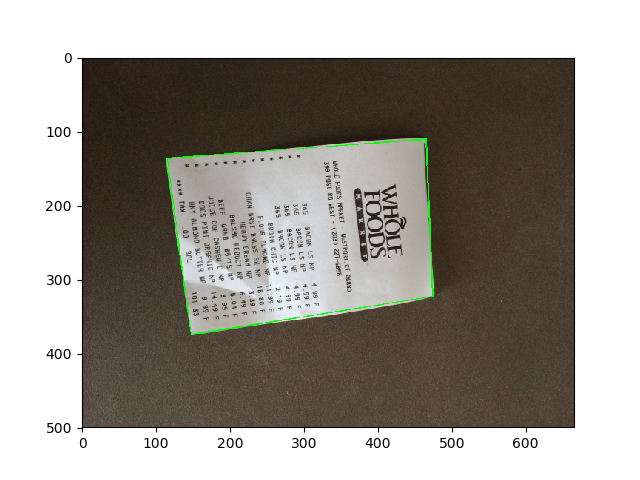

In [523]:
plot(image)

__FOUR POINT TRANSFORMATION__

In [524]:
screenCnt

array([[[465, 110]],

       [[113, 137]],

       [[147, 375]],

       [[474, 323]]], dtype=int32)

In [525]:
screenCnt.shape

(4, 1, 2)

In [526]:
screenCnt.reshape(4,2)

array([[465, 110],
       [113, 137],
       [147, 375],
       [474, 323]], dtype=int32)

In [527]:
# apply the four point transform to obtain a top-down view of the original image
final = four_point_transform(orig, screenCnt.reshape(4,2) * ratio)

<IPython.core.display.Javascript object>


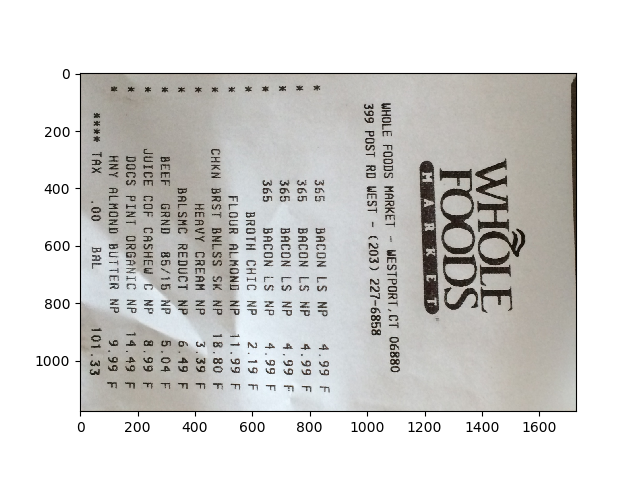

In [528]:
plot(final)

In [529]:
# final = imutils.rotate_bound(final, -90)

### Conclusión

__ORIGINAL__

<IPython.core.display.Javascript object>


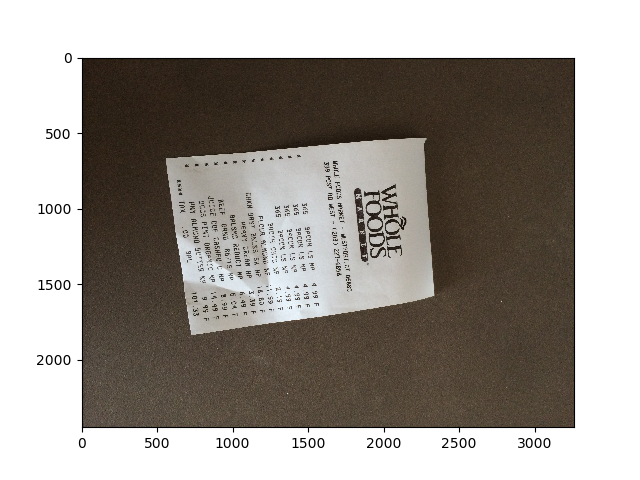

In [530]:
plot(orig)

__TRANSFORMADA__

<IPython.core.display.Javascript object>


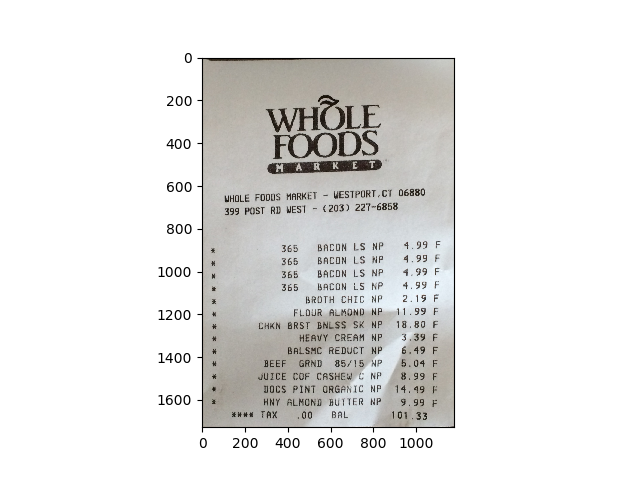

In [531]:
plot(final)